In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#import data
path = r'C:\Users\Admin\Documents\Data Analytics Course\Achievement 4\08-2020 Instacart Basket Analysis'
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

In [4]:
ords_prods_customers.head()

order_id customer_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329           1             1                   2                  8   
1   2398795           1             2                   3                  7   
2    473747           1             3                   3                 12   
3   2254736           1             4                   4                  7   
4    431534           1             5                   4                 15   

   days_since_prior_order  new_customer  product_id  add_to_cart_order  \
0                     NaN          True         196                  1   
1                    15.0         False         196                  1   
2                    21.0         False         196                  1   
3                    29.0         False         196                  1   
4                    28.0         False         196                  1   

   reordered  ...         frequency_flag first_name  surname  gender    state  \
0          0  ...  Non-frequent customer      Linda   Nguyen  Female  Alabama   
1          1  ...  Non-frequent customer      Linda   Nguyen  Female  Alabama   
2          1  ...  Non-frequent customer      Linda   Nguyen  Female  Alabama   
3          1  ...  Non-frequent customer      Linda   Nguyen  Female  Alabama   
4          1  ...  Non-frequent customer      Linda   Nguyen  Female  Alabama   

  age date_joined no_of_dependants marital_status  income  
0  31   2/17/2019                3        married   40423  
1  31   2/17/2019                3        married   40423  
2  31   2/17/2019                3        married   40423  
3  31   2/17/2019                3        married   40423  
4  31   2/17/2019                3        married   40423  

[5 rows x 34 columns]

## Question 2

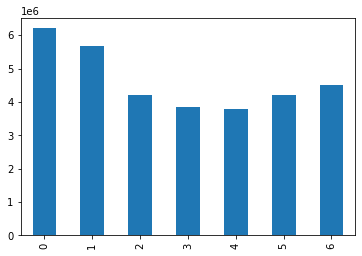

In [28]:
#creating bar chart of orders_day_of_week column
bar_dow = ords_prods_customers['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
#setting outlier prices as NaNs
ords_prods_customers.loc[ords_prods_customers['prices'] >100, 'prices'] = np.nan

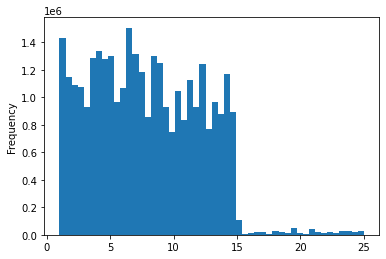

In [30]:
# creating histogram of prices column
hist_prices = ords_prods_customers['prices'].plot.hist(bins = 50)

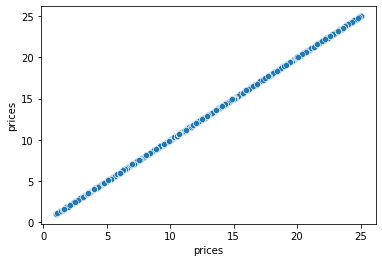

In [32]:
#creating scatterplot of prices column
sp_prices = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_customers)

In [9]:
#setting up random sample to create a line chart
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customers)) <= 0.7

In [10]:
# store 70% of sample in dataframe big
big = ords_prods_customers[dev]

In [11]:
#store 30% of sample in dataframe small
small = ords_prods_customers[~dev]

In [12]:
# reducing sample to only necessary columns
df = small[['orders_day_of_week','prices']]

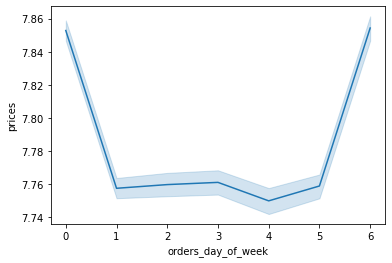

In [13]:
#creating line chart
line = sns.lineplot(data = df, x = 'orders_day_of_week',y = 'prices')

## Question 3

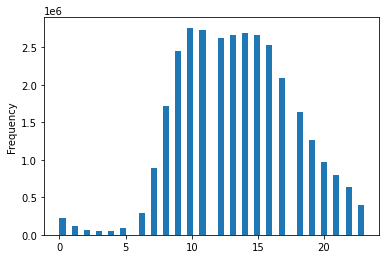

In [34]:
#creating a histogram of the “order_hour_of_day” column
hist_hrs = ords_prods_customers['order_hour_of_day'].plot.hist(bins = 50)

Most orders occur from mid morning to early evening. Early morning is the least busiest time.

## Question 4

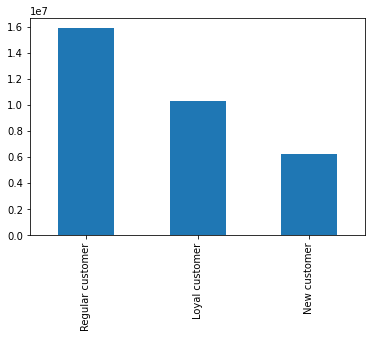

In [36]:
# Creating a bar chart from the “loyalty_flag”
bar_loyalty = ords_prods_customers['loyalty_flag'].value_counts().plot.bar()

## Question 5

In [19]:
#reducing sample df to necessary columns to check correlation between 'prices' and 'hour of day' columns
df_line_2 = small[['order_hour_of_day','prices']]

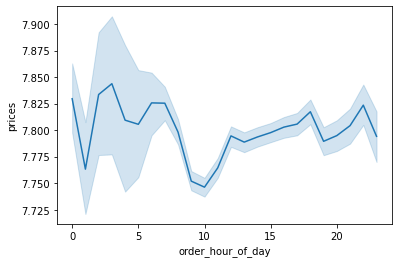

In [21]:
#creating a line chart from 'prices' and 'hour of day' columns
line_2 = sns.lineplot(data = df_line_2, x = 'order_hour_of_day',y = 'prices')

Even though earlier I stated that the early morning is the least busiest time, it looks like that is when customers spend the most money.

## Question 6

In [22]:
#reducing sample df to necessary columns to check correlation between 'age' and 'no_of_dependents' columns
df_line_3 = small[['age','no_of_dependants']]

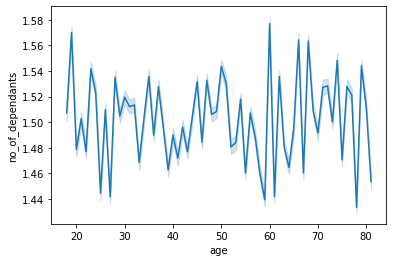

In [24]:
#creating a line chart from 'age' and 'no_of_dependents' columns
line_3 = sns.lineplot(data = df_line_3, x = 'age',y = 'no_of_dependants')

There seems to be no connection between customers' age and their number of dependents.

## Question 7

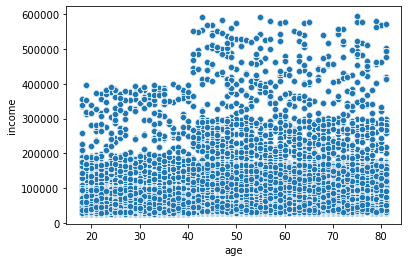

In [26]:
#scatterplot to check if theres a correlation btwn age and income
age_income_sp = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_customers)

The scatterplot breaks down customers' spending power into two groups: 20-40 year olds and 40+ year olds. The 20-40 age group tends to have a max income of of 400,000 and most hover between 100,000-200,000. Meanwhile the 40+ age group sees maximums of around 600,000 and a majority hovering from 100,000 to 300,000. Overall, it seems like 40+ year olds have greater spending power.

## Question 8

In [29]:
#exporting bar chart 'bar_dow'
bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow.png'))

In [31]:
#exporting histogram 'hist_prices'
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [33]:
#exporting line chart of 'orders_day_of_week' and 'prices' column
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices.png'))

In [35]:
#exporting histogram 'hist_hrs'
hist_hrs.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hours.png'))

In [37]:
#exporting bar chart 'bar_loyalty'
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [38]:
#exporting line chart of 'orders_hour_of_day' and 'prices' column
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

In [39]:
#exporting line chart of 'age' and 'no_of_dependents' columns
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

In [40]:
#exporting scatterplot of 'age' and 'income' columns
age_income_sp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sp_age_income.png'))